# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [14]:
sinasc0 = sinasc_raw.select_dtypes(include=['int64','float64'])

In [16]:
sinasc0.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES', 'CONSULTAS',
       'HORANASC', 'APGAR1', 'APGAR5', 'PESO', 'IDANOMAL', 'NUMEROLOTE',
       'DIFDATA', 'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU',
       'ESCMAE2010', 'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT',
       'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC',
       'TPMETESTIM', 'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART',
       'STCESPARTO', 'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC',
       'ESCMAEAGR1', 'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON',
       'PARIDADE', 'KOTELCHUCK', 'CONTADOR', 'munResLat', 'munResLon',
       'munResAlt', 'munResArea'],
      dtype='object')

In [34]:
sinasc0.CONSPRENAT.unique()

array([ 8., 10.,  6.,  7.,  9.,  5., 11.,  4.,  2.,  3., 13.,  1., 15.,
       12., 40., 17., 18., 38., 14., 39., nan, 16., 37.,  0., 35., 41.,
       36., 21., 20., 19., 99., 22., 23., 61.])

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [24]:
sinasc0.munResLat.describe().to_frame()

,munResLat
count,27027.000000
mean,-10.377988
std,1.372942
min,-13.499760
25%,-11.433870
50%,-10.435950
75%,-8.768890
max,-8.768890


In [27]:
sinasc1 = sinasc0.set_index('munResLat')
latitude = pd.cut(sinasc0['munResLat'], [-13.49,-10.5,-8,76])

In [37]:
sinasc0.groupby(latitude)['MESPRENAT', 'CONSPRENAT'].aggregate([sum, 
                    np.mean, min, max, np.median, 'std', 'var'])

C:\Users\renat\AppData\Local\Temp\ipykernel_14628\491922793.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc0.groupby(latitude)['MESPRENAT', 'CONSPRENAT'].aggregate([sum,


MESPRENAT                                                     \
                      sum      mean  min   max median        std         var   
munResLat                                                                      
(-13.49, -10.5]   93598.0  7.451477  1.0  99.0    2.0  21.388652  457.474417   
(-10.5, -8.0]    102609.0  8.906258  1.0  99.0    2.0  24.040978  577.968642   
(-8.0, 76.0]          0.0       NaN  NaN   NaN    NaN        NaN         NaN   

                CONSPRENAT                                                   
                       sum      mean  min   max median       std        var  
munResLat                                                                    
(-13.49, -10.5]   109255.0  8.581134  0.0  99.0    8.0  4.246649  18.034026  
(-10.5, -8.0]     105365.0  7.931125  0.0  99.0    8.0  5.863665  34.382564  
(-8.0, 76.0]           0.0       NaN  NaN   NaN    NaN       NaN        NaN

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [35]:
sinasc0.munResArea.describe().to_frame()

,munResArea
count,27027.000000
mean,14702.799767
std,13706.177751
min,459.978000
25%,3792.998000
50%,6896.648000
75%,34096.394000
max,34096.394000


In [38]:
areamunicipios = pd.cut(sinasc0['munResArea'], [1370,3000,6896])
sinasc0.groupby(areamunicipios)['STTRABPART', 'STCESPARTO'].aggregate([sum, 
                    np.mean, min, max, np.median, 'std', 'var'])

C:\Users\renat\AppData\Local\Temp\ipykernel_14628\2333361817.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc0.groupby(areamunicipios)['STTRABPART', 'STCESPARTO'].aggregate([sum,


STTRABPART                                                 \
                    sum      mean  min  max median       std       var   
munResArea                                                               
(1370, 3000]     8195.0  2.005629  1.0  9.0    2.0  0.556451  0.309638   
(3000, 6896]    13329.0  1.969706  1.0  9.0    2.0  0.432016  0.186638   

             STCESPARTO                                                 
                    sum      mean  min  max median       std       var  
munResArea                                                              
(1370, 3000]     8606.0  2.105701  1.0  9.0    2.0  1.130317  1.277616  
(3000, 6896]    14295.0  2.107785  1.0  9.0    2.0  0.832730  0.693439

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [39]:
sinasc0.munResAlt.describe().to_frame()

,munResAlt
count,27027.000000
mean,179.111999
std,123.138365
min,85.000000
25%,87.000000
50%,153.000000
75%,191.000000
max,595.000000


In [40]:
altitude = pd.cut(sinasc0['munResAlt'], [87,153,191])
sinasc0.groupby(altitude)['QTDPARTNOR', 'QTDPARTCES'].aggregate([sum, 
                    np.mean, min, max, np.median, 'std', 'var'])

C:\Users\renat\AppData\Local\Temp\ipykernel_14628\194371708.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc0.groupby(altitude)['QTDPARTNOR', 'QTDPARTCES'].aggregate([sum,


QTDPARTNOR                                                  \
                  sum      mean  min   max median       std       var   
munResAlt                                                               
(87, 153]      3283.0  0.744107  0.0  14.0    0.0  1.330296  1.769689   
(153, 191]     2915.0  0.423877  0.0   9.0    0.0  0.917432  0.841681   

           QTDPARTCES                                                  
                  sum      mean  min   max median       std       var  
munResAlt                                                              
(87, 153]      2333.0  0.519368  0.0   4.0    0.0  0.736689  0.542711  
(153, 191]     3563.0  0.517727  0.0  12.0    0.0  0.750559  0.563339

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [49]:
imediatas = {
    'Candeias do Jamari':'Porto Velho',
    'Guajará-Mirim':'Porto Velho',
    'Itapuã do Oeste':'Porto Velho',
    'Nova Mamoré':'Porto Velho',
    'Porto Velho':'Porto Velho',
    'Ariquemes':'Ariquemes',
    'Alto Paraíso':'Ariquemes',
    'Buritis':'Ariquemes',
    'Cacaulândia':'Ariquemes',
    'Campo Novo de Rondônia':'Ariquemes',
    'Cujubim':'Ariquemes',
    'Monte Negro':'Ariquemes',
    'Rio Crespo':'Ariquemes',
    'Governador Jorge Teixeira':'Jaru',
    'Jaru':'Jaru',
    'Machadinho D Oeste':'Jaru',
    'Theobroma':'Jaru',
   ' Vale do Anari':'Jaru',
    'Alvorada d Oeste':'Ji-Paraná',
    'Costa Marques':'Ji-Paraná',
    'Ji-Paraná':'Ji-Paraná',
    'Mirante da Serra':'Ji-Paraná',
    'Nova União':'Ji-Paraná',
    'Ouro Preto do Oeste':'Ji-Paraná',
    'Presidente Médici':'Ji-Paraná',
    'São Francisco do Guaporé':'Ji-Paraná',
    'São Miguel do Guaporé':'Ji-Paraná',
    'Seringueiras':'Ji-Paraná',
    'Teixeirópolis':'Ji-Paraná',
    'Urupá':'Ji-Paraná',
    'Vale do Paraíso':'Ji-Paraná',
    'Alta Floresta d Oeste':'Cacoal',
   ' Alto Alegre dos Parecis':'Cacoal',
   ' Cacoal':'Cacoal',
    'Castanheiras':'Cacoal',
    'Espigão d Oeste':'Cacoal',
    'Ministro Andreazza':'Cacoal',
    'Nova Brasilândia d Oeste':'Cacoal',
    'Novo Horizonte do Oeste':'Cacoal',
    'Parecis':'Cacoal',
    'Pimenta Bueno':'Cacoal',
    'Primavera de Rondônia':'Cacoal',
    'Rolim de Moura':'Cacoal',
    'Santa Luzia d Oeste':'Cacoal',
    'São Felipe d Oeste':'Cacoal',
    'Cabixi':'Vilhena',
    'Cerejeiras':'Vilhena',
   ' Chupinguaia':'Vilhena',
   ' Colorado do Oeste':'Vilhena',
    'Corumbiara':'Vilhena',
    'Pimenteiras do Oeste':'Vilhena',
   ' Vilhena':'Vilhena'

}

In [50]:
sinasc4 = sinasc_raw.set_index('munResNome')


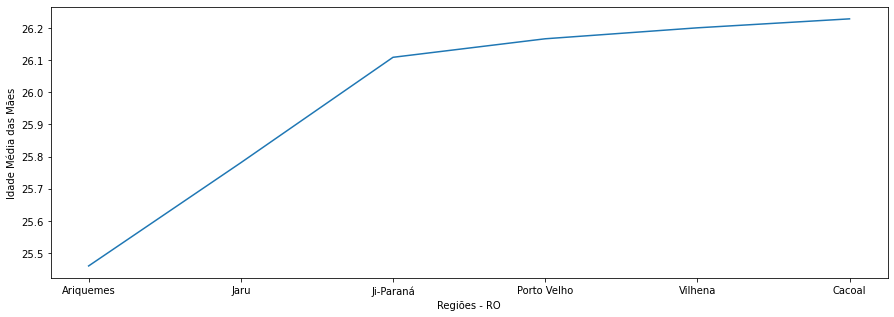

In [51]:
sinasc4.groupby(imediatas)['IDADEMAE'].mean().sort_values().plot(figsize = [15,5])

plt.ylabel('Idade Média das Mães');
plt.xlabel('Regiões - RO');

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [54]:
idh = {
    'Porto Velho':'IDH-M alto',
    'Vilhena':'IDH-M alto',
    'Cacoal':'IDH-M alto',
    'Ji-Paraná':'IDH-M alto',
    'Pimenta Bueno':'IDH-M alto',
    'Ariquemes':'IDH-M alto',
    'Rolim de Moura':'IDH-M alto',
    'Cerejeiras':'IDH-M médio',
    'Jaru':'IDH-M médio',
    'Colorado do Oeste':'IDH-M médio',
    'Ouro Preto do Oeste':'IDH-M médio',
    'Espigão dOeste':'IDH-M médio',
    'Santa Luzia dOeste':'IDH-M médio',
    'Pimenteiras do Oeste':'IDH-M médio',
    'Presidente Médici':'IDH-M médio',
    'Castanheiras':'IDH-M médio',
    'Guajará-Mirim':'IDH-M médio',
    'Chupinguaia':'IDH-M médio',
    'Cabixi':'IDH-M médio',
    'Candeias do Jamari':'IDH-M médio',
    'São Felipe dOeste':'IDH-M médio',
    'Cacaulândia':'IDH-M médio',
    'São Miguel do Guaporé':'IDH-M médio',
    'Mirante da Serra':'IDH-M médio',
    'Alvorada d Oeste':'IDH-M médio',
    'Teixeirópolis':'IDH-M médio',
    'Nova Brasilândia dOeste':'IDH-M médio',
    'Rio Crespo':'IDH-M médio',
    'Primavera de Rondônia':'IDH-M médio',
    'Alta Floresta dOeste':'IDH-M médio',
    'Ministro Andreazza':'IDH-M médio',
    'Novo Horizonte do Oeste':'IDH-M médio',
    'Vale do Paraíso':'IDH-M médio',
    'Alto Paraíso':'IDH-M médio',
    'Parecis':'IDH-M médio',
    'Buritis':'IDH-M médio',
    'Itapuã do Oeste':'IDH-M médio',
    'Corumbiara':'IDH-M médio',
    'Cujubim':'IDH-M médio',
    'Costa Marques':'IDH-M médio',
    'São Francisco do Guaporé':'IDH-M médio',
    'Urupá':'IDH-M médio',
    'Monte Negro':'IDH-M médio',
    'Seringueiras':'IDH-M baixo',
    'Governador Jorge Teixeira':'IDH-M baixo',
    'Machadinho dOeste':'IDH-M baixo',
    'Campo Novo de Rondônia':'IDH-M baixo',
    'Alto Alegre dos Parecis':'IDH-M baixo',
    'Theobroma':'IDH-M baixo',
    'Nova União':'IDH-M baixo',
    'Nova Mamoré':'IDH-M baixo',
    'Vale do Anari':'IDH-M baixo',
}

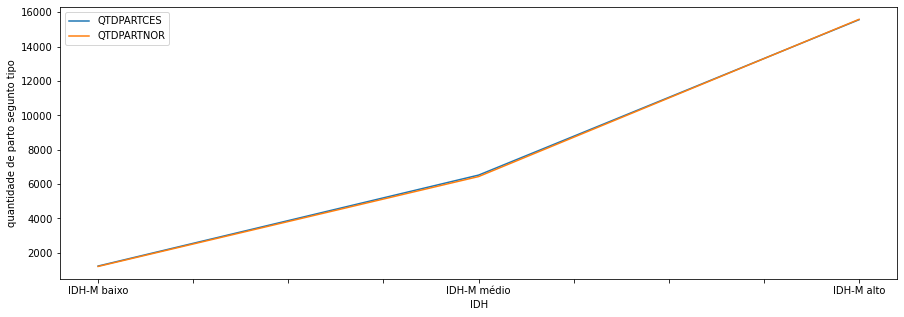

In [69]:
sinasc4.groupby(idh)[['QTDPARTCES','QTDPARTNOR']].count().sort_values(by = ['QTDPARTCES']).plot(figsize = [15,5])

plt.ylabel('quantidade de parto segunto tipo')
plt.xlabel('IDH');

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [70]:
desenvolvimento = {
    'Ariquemes':'moderado',
    'Vilhena':'moderado',
    'Pimenta Bueno':'moderado',
    'Porto Velho':'moderado',
    'Ji-Paraná':'moderado',
    'Cacoal':'moderado',
    'Santa Luzia d Oeste':'moderado',
    'Rolim de Moura':'moderado',
    'Chupinguaia':'moderado',
    'São Miguel do Guaporé':'moderado',
    'Pimenteiras do Oeste':'moderado',
    'Teixeirópolis':'moderado',
    'Colorado do Oeste':'moderado',
    'Jaru':'moderado',
    'Rio Crespo':'moderado',
    'Primavera de Rondônia':'moderado',
    'Alta Floresta d Oeste':'moderado',
    'Ouro Preto do Oeste':'moderado',
    'São Francisco do Guaporé':'moderado',
    'Candeias do Jamari':'moderado',
    'Buritis':'moderado',
    'São Felipe d Oeste':'moderado',
    'Presidente Médici':'moderado',
    'Cerejeiras':'moderado',
    'Monte Negro':'moderado',
    'Urupá':'moderado',
    'Espigão d Oeste':'regular',
    'Seringueiras':'regular',
    'Alvorada d Oeste':'regular',
    'Itapuã do Oeste':'regular',
    'Cabixi':'regular',
    'Novo Horizonte do Oeste':'regular',
   ' Nova Brasilândia d Oeste':'regular',
    'Vale do Paraíso':'regular',
    'Corumbiara':'regular',
    'Alto Paraíso':'regular',
    'Cacaulândia':'regular',
    'Vale do Anari':'regular',
    'Ministro Andreazza':'regular',
    'Costa Marques':'regular',
    'Nova União':'regular',
    'Guajará-Mirim':'regular',
    'Mirante da Serra':'regular',
    'Parecis':'regular',
    'Castanheiras':'regular',
    'Theobroma':'regular',
    'Machadinho dOeste':'regular',
    'Campo Novo de Rondônia':'regular',
    'Nova Mamoré':'regular',
    'Cujubim':'regular',
    'Alto Alegre dos Parecis':'regular',
    'Governador Jorge Teixeira':'regular',
    'Nenhum':'alto',
    'Nenhum':'baixo'


}


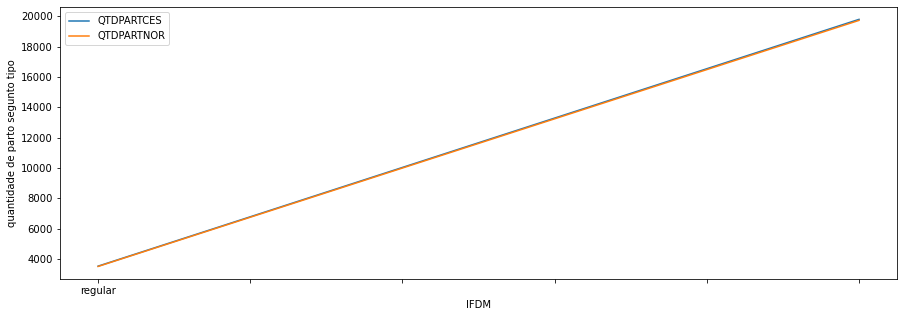

In [73]:
sinasc4.groupby(desenvolvimento)[['QTDPARTCES','QTDPARTNOR']].count().sort_values(by = ['QTDPARTCES']).plot(figsize = [15,5])

plt.ylabel('quantidade de parto segunto tipo')
plt.xlabel('IFDM');

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [92]:
pib = {'Porto Velho': 'Acima de 1 Bilhão', 'Ji-Paraná': 'Acima de 1 Bilhão', 'Vilhena': 'Acima de 1 Bilhão', 'Ariquemes': 'Acima de 1 Bilhão', 'Cacoal': 'Acima de 1 Bilhão', 'Jaru': 'Acima de 1 Bilhão', 'Rolim de Moura': 'Acima de 1 Bilhão', 'Pimenta Bueno': 'Acima de 1 Bilhão', 'Guajará-Mirim': 'Acima de 500 Milhões', 'Ouro Preto do Oeste': 'Acima de 500 Milhões', 'Buritis': 'Acima de 500 Milhões', 'Machadinho d''Oeste': 'Acima de 500 Milhões', 'Espigão d''Oeste': 'Acima de 500 Milhões', 'São Miguel do Guaporé': 'Acima de 500 Milhões', 'Candeias do Jamari': 'Acima de 500 Milhões', 'Nova Mamoré': 'Acima de 500 Milhões', 'Cerejeiras': 'Acima de 500 Milhões', 'Alta Floresta d''Oeste': 'Acima de 300 Milhões', 'Presidente Médici': 'Acima de 300 Milhões', 'Cujubim': 'Acima de 300 Milhões', 'Nova Brasilândia d''Oeste': 'Acima de 300 Milhões', 'Alto Paraíso': 'Acima de 300 Milhões', 'São Francisco do Guaporé': 'Acima de 300 Milhões', 'Colorado do Oeste': 'Acima de 300 Milhões', 'Monte Negro': 'Acima de 200 Milhões', 'Alto Alegre dos Parecis': 'Acima de 200 Milhões', 'Campo Novo de Rondônia': 'Acima de 200 Milhões', 'Alvorada d''Oeste': 'Acima de 200 Milhões', 'Chupinguaia': 'Acima de 100 Milhões', 'Corumbiara': 'Acima de 100 Milhões', 'Ministro Andreazza': 'Acima de 100 Milhões', 'Urupá': 'Acima de 100 Milhões', 'Costa Marques': 'Acima de 100 Milhões', 'Seringueiras': 'Acima de 100 Milhões', 'Mirante da Serra': 'Acima de 100 Milhões', 'Governador Jorge Teixeira': 'Acima de 100 Milhões', 'Theobroma': 'Acima de 100 Milhões', 'Santa Luzia d''Oeste': 'Acima de 100 Milhões', 'Novo Horizonte do Oeste': 'Acima de 100 Milhões', 'Itapuã do Oeste': 'Acima de 100 Milhões', 'Vale do Paraíso': 'Acima de 100 Milhões', 'Cacaulândia': 'Acima de 100 Milhões', 'Cabixi': 'Acima de 100 Milhões', 'Vale do Anari': 'Acima de 100 Milhões', 'Nova União': 'Até 100 Milhões', 'Parecis': 'Até 100 Milhões', 'Rio Crespo': 'Até 100 Milhões', 'Pimenteiras do Oeste': 'Até 100 Milhões', 'Teixeirópolis': 'Até 100 Milhões', 'São Felipe d''Oeste': 'Até 100 Milhões', 'Castanheiras': 'Até 100 Milhões', 'Primavera de Rondônia': 'Até 100 Milhões'}

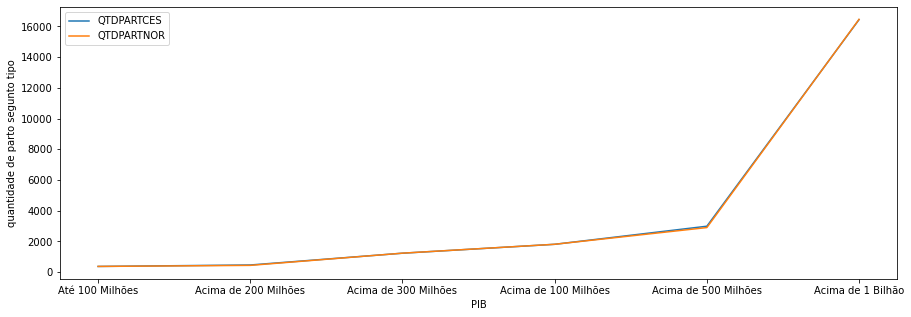

In [95]:
sinasc4.groupby(pib)[['QTDPARTCES','QTDPARTNOR']].count().sort_values(by = ['QTDPARTCES']).plot(figsize = [15,5])

plt.ylabel('quantidade de parto segunto tipo')
plt.xlabel('PIB');

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Depreende-se da análise de dados que a quantidade de partos cesáreos e vaginais são maiores em regiões mais populosas, com maior IDH e maior desenvolvimento. Tal fato pode está relacionado à concentração dos centros médicos nessas regiões, fazendo com que as mulheres tenham que sair do seu município de origem.